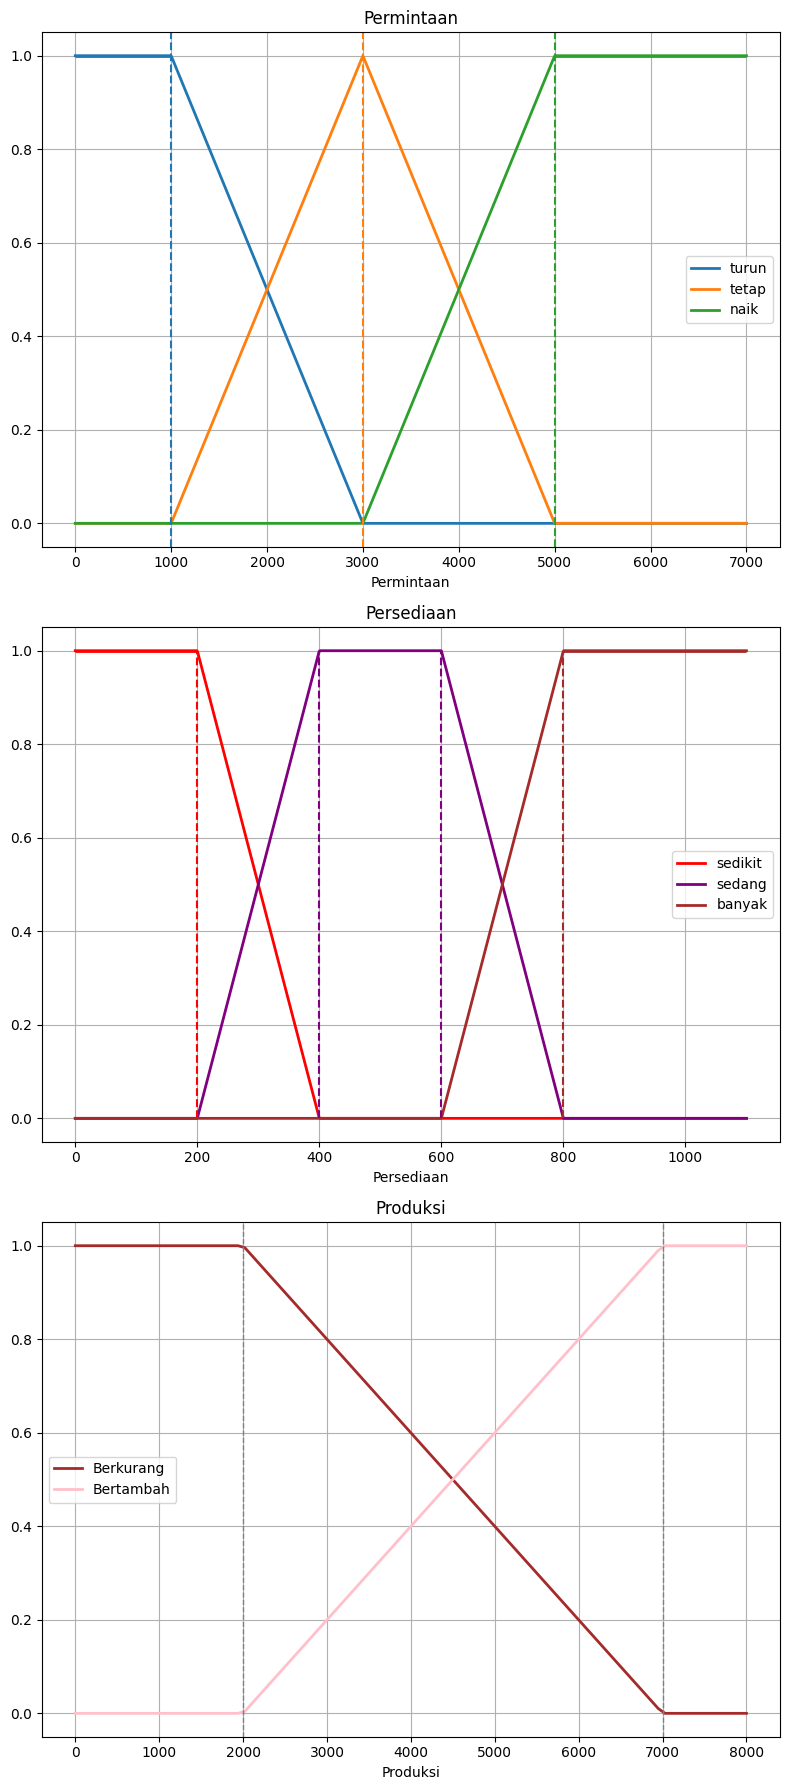

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ======================= Fungsi Permintaan =======================
def turun(x):
    return np.piecewise(x, [x <= 1000, (x > 1000) & (x <= 3000), x > 3000],
                        [1, lambda x: (3000 - x) / (3000 - 1000), 0])

def tetap(x):
    return np.piecewise(x, [(x > 1000) & (x <= 3000), (x > 3000) & (x <= 5000)],
                        [lambda x: (x - 1000) / (3000 - 1000), lambda x: (5000 - x) / (5000 - 3000), 0])

def naik(x):
    return np.piecewise(x, [x <= 3000, (x > 3000) & (x <= 5000), x > 5000],
                        [0, lambda x: (x - 3000) / (5000 - 3000), 1])

# ======================= Fungsi Persediaan =======================
def sedikit(x):
    return np.piecewise(x, [x <= 200, (x > 200) & (x <= 400), x > 400],
                        [1, lambda x: (400 - x) / (400 - 200), 0])

def sedang(x):
    return np.piecewise(x, [(x > 200) & (x <= 400), (x > 400) & (x <= 600), (x > 600) & (x <= 800)],
                        [lambda x: (x - 200) / (400 - 200), 1, lambda x: (800 - x) / (800 - 600)])

def banyak(x):
    return np.piecewise(x, [x <= 600, (x > 600) & (x <= 800), x > 800],
                        [0, lambda x: (x - 600) / (800 - 600), 1])

# ======================= Class Produksi =======================
class Fuzzy():
    def __init__(self):
        self.min = 0
        self.max = 0

    def down(self, x):
        return (self.max - x) / (self.max - self.min)

    def up(self, x):
        return (x - self.min) / (self.max - self.min)

class Production(Fuzzy):
    def __init__(self):
        super().__init__()
        self.min = 2000
        self.max = 7000

    def reduce(self, x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return self.down(x)

    def add(self, x):
        if x < self.min:
            return 0
        if x > self.max:
            return 1
        return self.up(x)

# ======================= Plot Semua Grafik =======================
fig, axs = plt.subplots(3, 1, figsize=(8, 18))

# -------- Grafik 1: Permintaan --------
x1 = np.linspace(0, 7000, 1000)
axs[0].plot(x1, turun(x1), color='tab:blue', label='turun', linewidth=2)
axs[0].plot(x1, tetap(x1), color='tab:orange', label='tetap', linewidth=2)
axs[0].plot(x1, naik(x1), color='tab:green', label='naik', linewidth=2)
axs[0].hlines(1.0, 0, 1000, colors='tab:blue', linewidth=2)  # Horizontal biru
axs[0].hlines(1.0, 5000, 7000, colors='tab:green', linewidth=2)  # Horizontal hijau
axs[0].axvline(1000, color='tab:blue', linestyle='--')  # Vertikal biru
axs[0].axvline(3000, color='tab:orange', linestyle='--')  # Vertikal orange
axs[0].axvline(5000, color='tab:green', linestyle='--')  # Vertikal hijau
axs[0].set_title('Permintaan')
axs[0].set_xlabel('Permintaan')

axs[0].legend()
axs[0].grid()

# -------- Grafik 2: Persediaan --------
x2 = np.linspace(0, 1100, 1000)
axs[1].plot(x2, sedikit(x2), color='red', label='sedikit', linewidth=2)
axs[1].plot(x2, sedang(x2), color='purple', label='sedang', linewidth=2)
axs[1].plot(x2, banyak(x2), color='brown', label='banyak', linewidth=2)
axs[1].hlines(1, 0, 200, colors='red', linewidth=2)  # Horizontal sedikit
axs[1].hlines(1, 800, 1100, colors='brown', linewidth=2)  # Horizontal banyak
axs[1].vlines(200, 0, 1, colors='red', linestyles='dashed')  # Vertikal
axs[1].vlines(400, 0, 1, colors='purple', linestyles='dashed')  
axs[1].vlines(600, 0, 1, colors='purple', linestyles='dashed')
axs[1].vlines(800, 0, 1, colors='brown', linestyles='dashed')
axs[1].set_title('Persediaan')
axs[1].set_xlabel('Persediaan')

axs[1].legend()
axs[1].grid()

# -------- Grafik 3: Produksi --------
production = Production()
x3 = np.linspace(0, 8000, 100)
reduce_values = [production.reduce(x) for x in x3]
add_values = [production.add(x) for x in x3]
axs[2].plot(x3, reduce_values, label='Berkurang', color='brown', linewidth=2)
axs[2].plot(x3, add_values, label='Bertambah', color='pink', linewidth=2)
axs[2].axvline(2000, color='grey', linestyle='--', linewidth=1)  # Vertikal
axs[2].axvline(7000, color='grey', linestyle='--', linewidth=1)
axs[2].set_title('Produksi')
axs[2].set_xlabel('Produksi')

axs[2].legend()
axs[2].grid()

# Tampilkan Semua Grafik
plt.tight_layout()
plt.show()


In [3]:
#Rule:

#Jika Permintaan Turun dan Persediaan Sedikit maka produksi Bertambah
#Jika Permintaan Turun dan Persediaan Sedang maka produksi Berkurang
#Jika Permintaan Turun dan Persediaan Banyak maka produksi Berkurang
#Jika Permintaan Tetap dan Persediaan Sedikit maka produksi Bertambah
#Jika Permintaan Tetap dan Persediaan Sedang maka produksi Berkurang
#Jika Permintaan Tetap dan Persediaan Banyak maka produksi Berkurang
#Jika Permintaan Naik dan Persediaan Sedikit maka produksi Bertambah
#Jika Permintaan Naik dan Persediaan Sedang maka produksi Bertambah
#Jika Permintaan Naik dan Persediaan Banyak maka produksi Berkurang

In [ ]:
#Perhitungan Manualnya
import fitz  # PyMuPDF
from IPython.display import display
from PIL import Image
import io

def pdf_to_images(pdf_path):
    # Buka file PDF
    doc = fitz.open(pdf_path)
    images = []
    
    # Loop melalui setiap halaman
    for page_number in range(len(doc)):
        page = doc.load_page(page_number)
        image_list = page.get_images(full=True)
        
        for img_index, img in enumerate(image_list):
            xref = img[0]
            base_image = doc.extract_image(xref)
            image_bytes = base_image["image"]
            
            # Convert bytes ke Image
            image = Image.open(io.BytesIO(image_bytes))
            images.append(image)
            
    return images

# Ekstrak gambar dari file PDF
pdf_images = pdf_to_images("Tugas Fuzzy.pdf")

# Tampilkan gambar
if pdf_images:
    for img in pdf_images:
        display(img)
else:
    print("Tidak ada gambar yang ditemukan pada file PDF.")
